# BA820 Project Proposal: Mapping the Economic Burden of Childcare Across US Counties

**Project Title**: Mapping the Economic Burden of Childcare Across US Counties

**Section and Team Number**: B1 Team 9

**Members**: Kara Liao, Li-Hsin Chang, Mokhinur Talibzhanova, Nathan Dai-Yin Leung


### Environment Setup

In [1]:
from google.colab import data_table
from google.colab import drive
import pandas as pd

# Enable the interactive table feature
data_table.enable_dataframe_formatter()

# Access Google Drive
drive.mount('/content/drive')

# Read the CSV from your Drive
df = pd.read_csv("/content/drive/MyDrive/childcare_costs.csv")

df.head()


Mounted at /content/drive


,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53


In [2]:
df2=pd.read_csv("/content/drive/MyDrive/counties.csv")
df2.head()

,county_fips_code,county_name,state_name,state_abbreviation
0,1001,Autauga County,Alabama,AL
1,1003,Baldwin County,Alabama,AL
2,1005,Barbour County,Alabama,AL
3,1007,Bibb County,Alabama,AL
4,1009,Blount County,Alabama,AL


### Data Cleaning

In [3]:
df.columns

Index(['county_fips_code', 'study_year', 'unr_16', 'funr_16', 'munr_16',
       'unr_20to64', 'funr_20to64', 'munr_20to64', 'flfpr_20to64',
       'flfpr_20to64_under6', 'flfpr_20to64_6to17',
       'flfpr_20to64_under6_6to17', 'mlfpr_20to64', 'pr_f', 'pr_p', 'mhi_2018',
       'me_2018', 'fme_2018', 'mme_2018', 'total_pop', 'one_race',
       'one_race_w', 'one_race_b', 'one_race_i', 'one_race_a', 'one_race_h',
       'one_race_other', 'two_races', 'hispanic', 'households',
       'h_under6_both_work', 'h_under6_f_work', 'h_under6_m_work',
       'h_under6_single_m', 'h_6to17_both_work', 'h_6to17_fwork',
       'h_6to17_mwork', 'h_6to17_single_m', 'emp_m', 'memp_m', 'femp_m',
       'emp_service', 'memp_service', 'femp_service', 'emp_sales',
       'memp_sales', 'femp_sales', 'emp_n', 'memp_n', 'femp_n', 'emp_p',
       'memp_p', 'femp_p', 'mcsa', 'mfccsa', 'mc_infant', 'mc_toddler',
       'mc_preschool', 'mfcc_infant', 'mfcc_toddler', 'mfcc_preschool'],
      dtype='object')

In [4]:
childcare = df.copy()

In [5]:
childcare = childcare[
    (childcare["mc_infant"] > 0) &
    (childcare["mhi_2018"] > 0)
]

In [6]:
childcare.shape
childcare[["mc_infant","mhi_2018"]].describe()

,mc_infant,mhi_2018
count,23593.000000,23593.000000
mean,146.051770,50631.312692
std,53.698566,13407.444469
min,27.730000,19841.920000
25%,108.750000,41998.000000
50%,134.500000,48634.920000
75%,166.330000,56421.300000
max,470.000000,136268.000000


In [7]:
childcare.isna().sum().sort_values(ascending=False)

,0
mfccsa,251
mfcc_infant,251
mfcc_toddler,251
mfcc_preschool,251
county_fips_code,0
...,...
femp_n,0
mc_toddler,0
mc_infant,0
mcsa,0


In [8]:
childcare_clean = childcare.dropna(
    subset=["mfcc_infant", "mfcc_toddler", "mfcc_preschool"]
)

In [9]:
childcare_clean.isna().sum().sort_values(ascending=False)

,0
county_fips_code,0
study_year,0
unr_16,0
funr_16,0
munr_16,0
...,...
mc_toddler,0
mc_preschool,0
mfcc_infant,0
mfcc_toddler,0


In [10]:
childcare_clean.duplicated(
    subset=["county_fips_code","study_year"]
).sum()

np.int64(0)

In [11]:
childcare_clean.dtypes

,0
county_fips_code,int64
study_year,int64
unr_16,float64
funr_16,float64
munr_16,float64
...,...
mc_toddler,float64
mc_preschool,float64
mfcc_infant,float64
mfcc_toddler,float64


In [12]:
childcare_clean["mc_infant"].describe()
childcare_clean["mhi_2018"].describe()

,mhi_2018
count,23342.000000
mean,50428.437534
std,13158.072756
min,19841.920000
25%,41946.270000
50%,48541.050000
75%,56204.135000
max,136268.000000


In [13]:
childcare_clean

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34562,56045,2014,3.60,5.36,2.28,2.4,4.8,0.6,75.9,74.8,...,23.55,6.13,91.14,112.94,147.36,120.38,123.99,110.71,110.71,111.47
34563,56045,2015,5.16,7.86,3.16,4.2,7.6,1.6,73.2,82.0,...,27.26,6.36,94.76,110.89,140.36,118.77,118.77,110.89,110.89,110.89
34564,56045,2016,3.61,4.67,2.79,3.4,4.5,2.6,69.7,68.1,...,24.55,6.72,98.38,108.85,133.37,117.16,113.55,114.10,111.07,110.31
34565,56045,2017,2.24,2.64,1.95,2.3,2.8,2.0,71.4,63.6,...,30.26,4.23,102.01,106.81,126.38,115.55,108.32,117.30,111.26,109.74


In [14]:
df2.isna().sum().sort_values(ascending=False)

,0
county_fips_code,0
county_name,0
state_name,0
state_abbreviation,0


In [34]:
df2.head()

,county_fips_code,county_name,state_name,state_abbreviation
0,1001,Autauga County,Alabama,AL
1,1003,Baldwin County,Alabama,AL
2,1005,Barbour County,Alabama,AL
3,1007,Bibb County,Alabama,AL
4,1009,Blount County,Alabama,AL


### Preproccesing & EDA

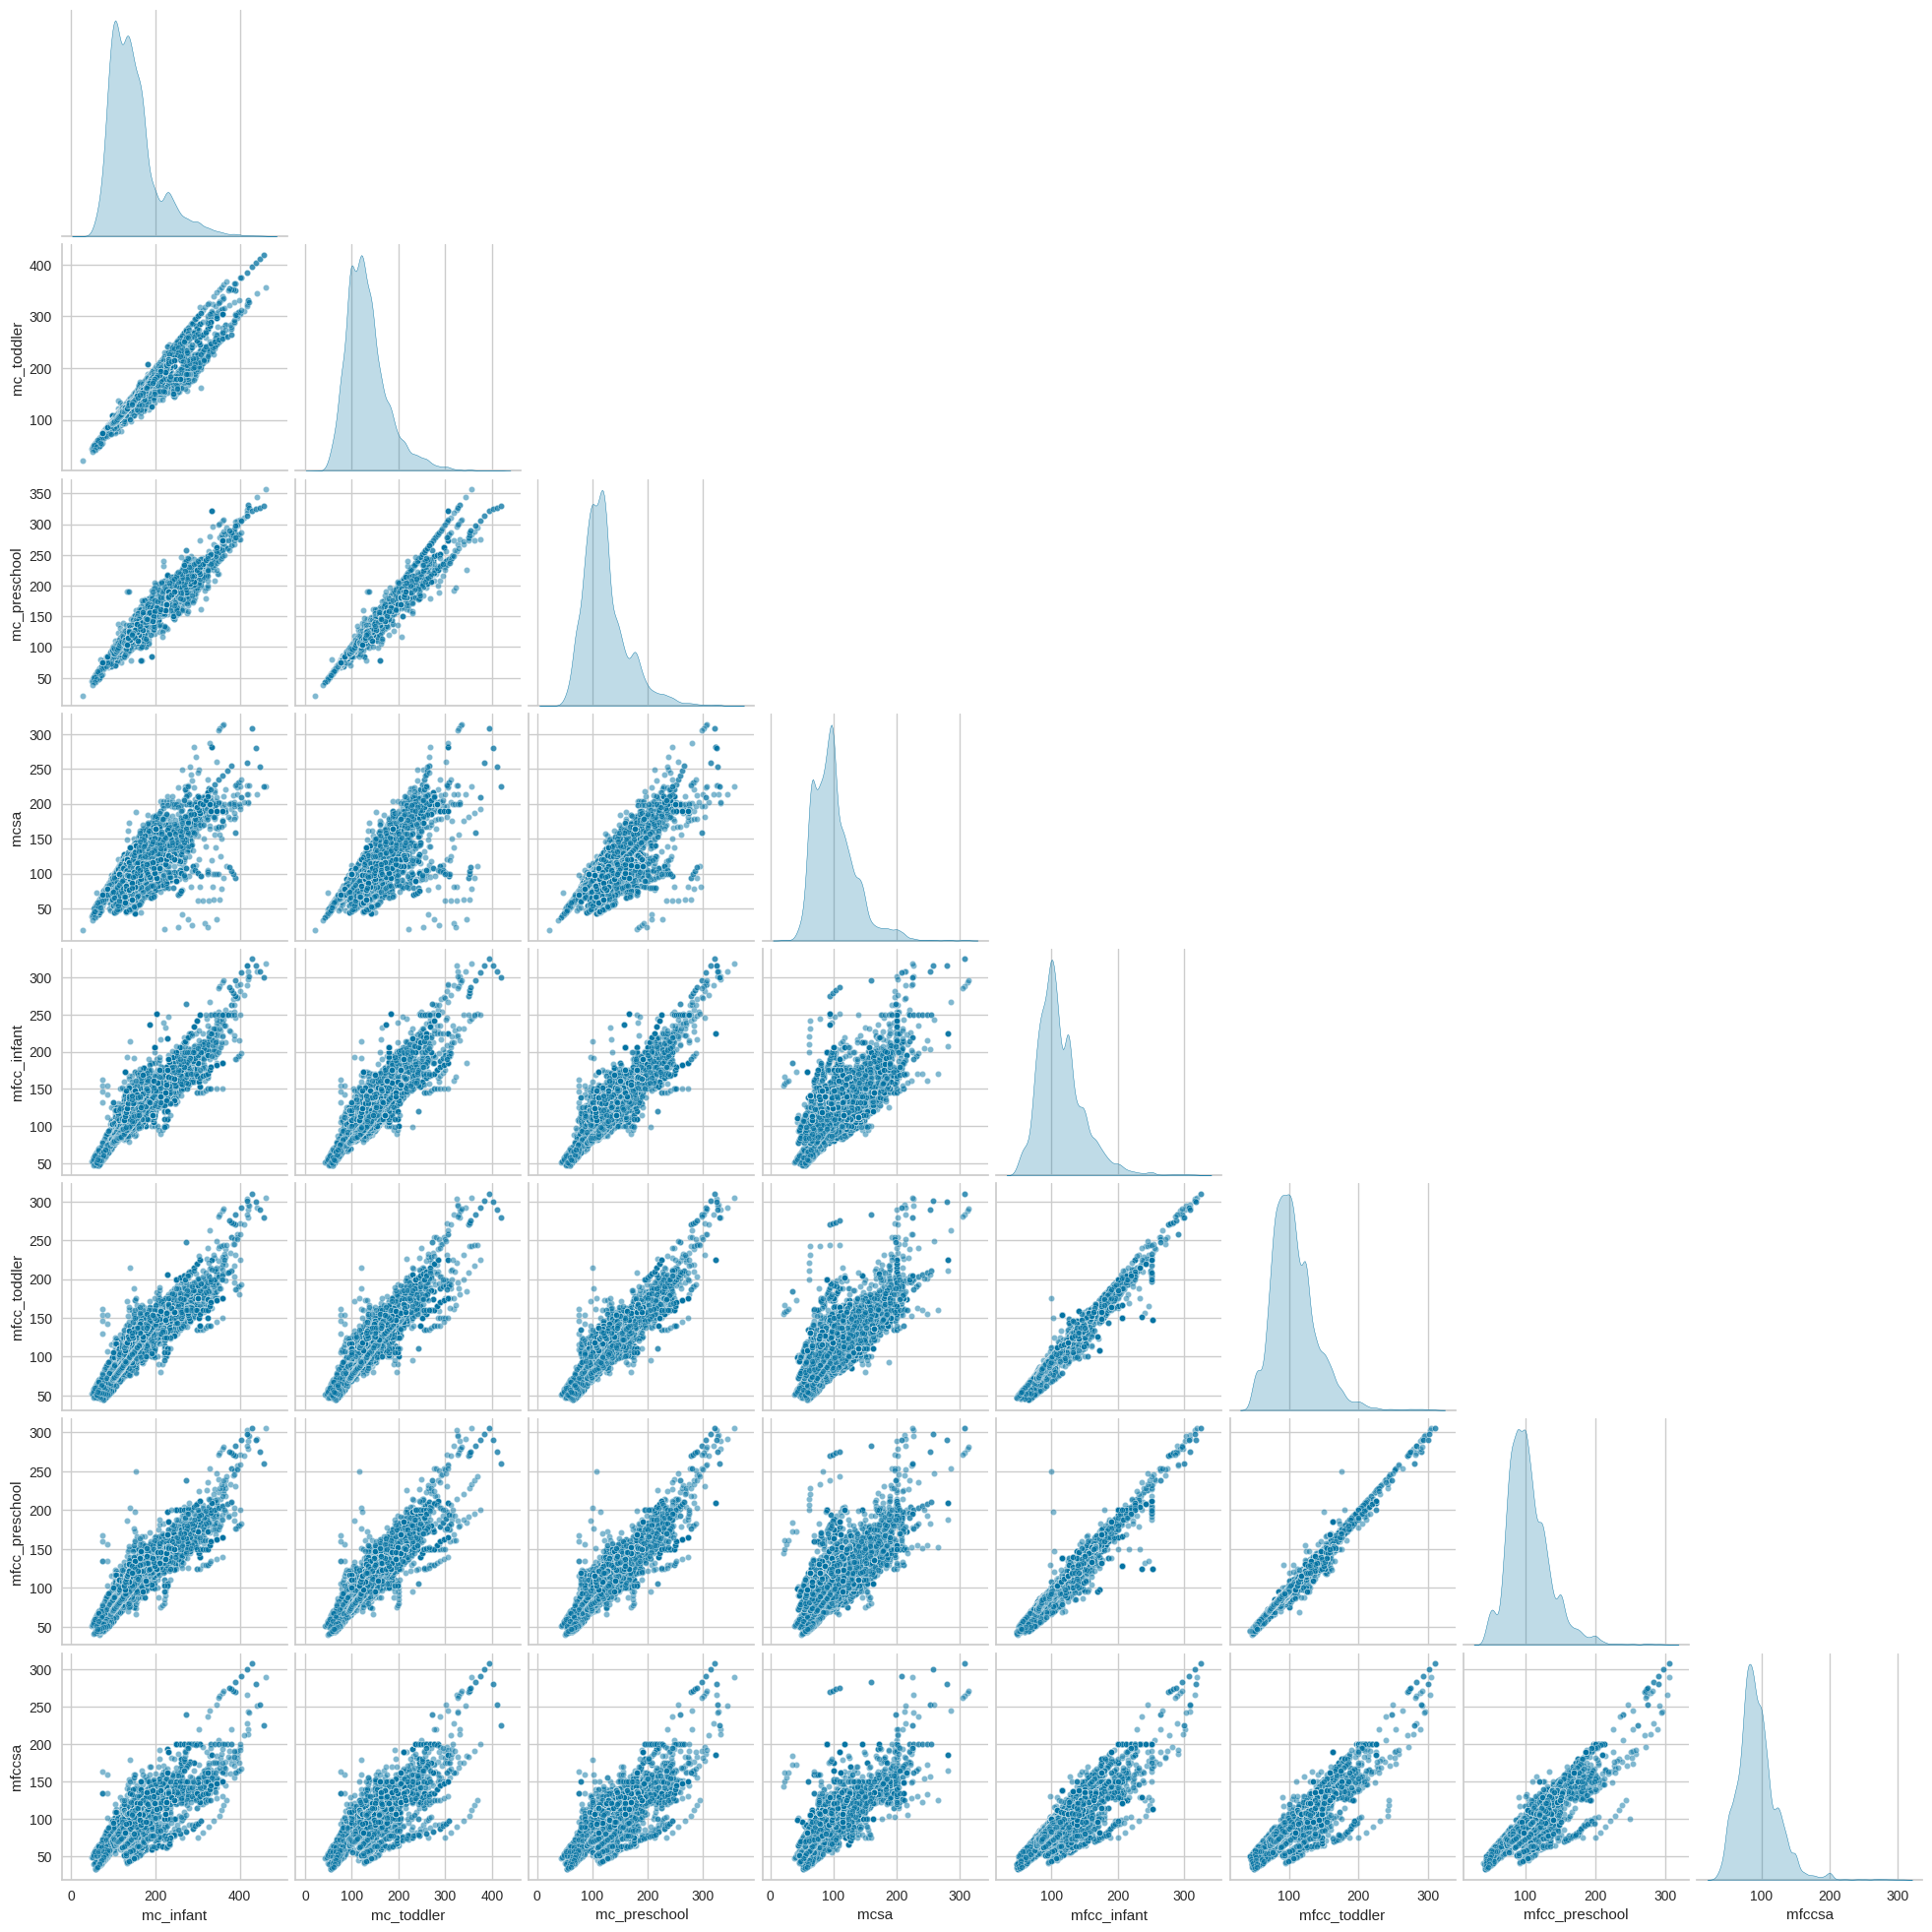

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
cost_cols = [
    "mc_infant",
    "mc_toddler",
    "mc_preschool",
    "mcsa",
    "mfcc_infant",
    "mfcc_toddler",
    "mfcc_preschool",
    "mfccsa"
]

cost_df = childcare_clean[cost_cols]

pairplot = sns.pairplot(
    cost_df,
    diag_kind="kde",
    corner=True,
    plot_kws={"alpha": 0.5, "s": 20}
)

plt.show()


<Axes: >

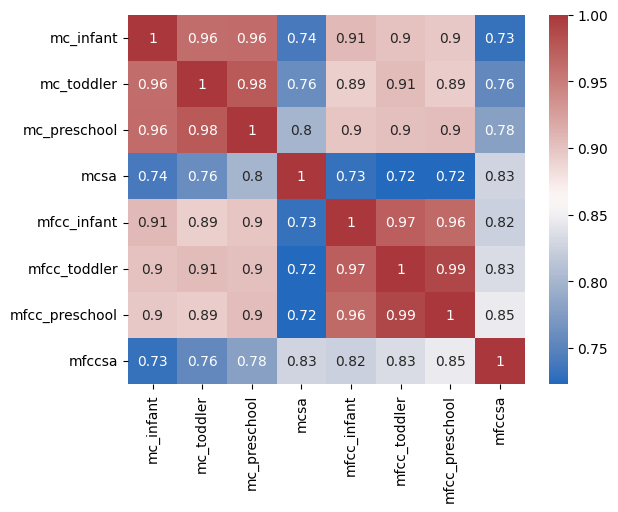

In [16]:
corr = cost_df.corr( numeric_only=True)
sns.heatmap(corr, annot=True, cmap="vlag")

In [17]:
#normalize
from sklearn.preprocessing import StandardScaler
X = df[cost_cols].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=cost_cols)

X_scaled_df.head()

,mc_infant,mc_toddler,mc_preschool,mcsa,mfcc_infant,mfcc_toddler,mfcc_preschool,mfccsa
0,-0.760837,-0.578337,-0.939269,-0.586440,-0.912068,-0.776245,-0.785747,-0.400439
1,-0.757849,-0.574656,-0.895706,-0.514128,-0.792037,-0.644831,-0.637943,-0.245609
2,-0.754675,-0.570746,-0.852143,-0.441817,-0.672006,-0.513418,-0.490140,-0.090779
3,-0.751500,-0.566836,-0.808581,-0.369216,-0.551671,-0.381671,-0.341991,0.064413
4,-0.748513,-0.563156,-0.765018,-0.296904,-0.431640,-0.250258,-0.194187,0.219243


### Analysis

### determining best K

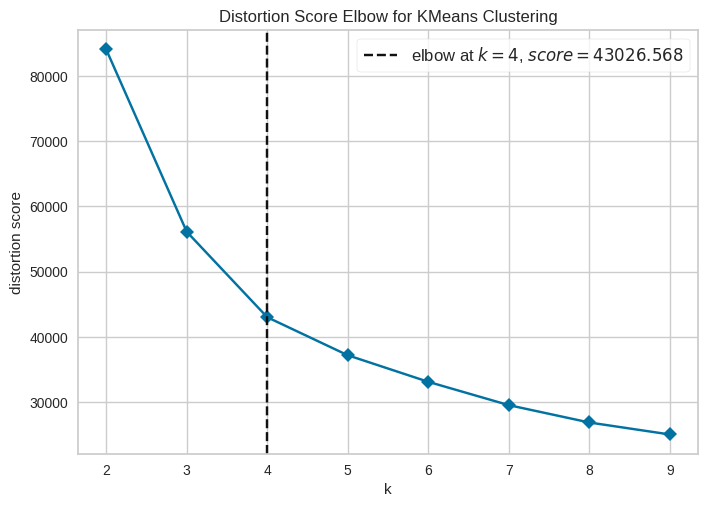

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clustering = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(clustering, k=(2, 10), metric="distortion", timings=False)
visualizer.fit(X_scaled_df)
visualizer.show()


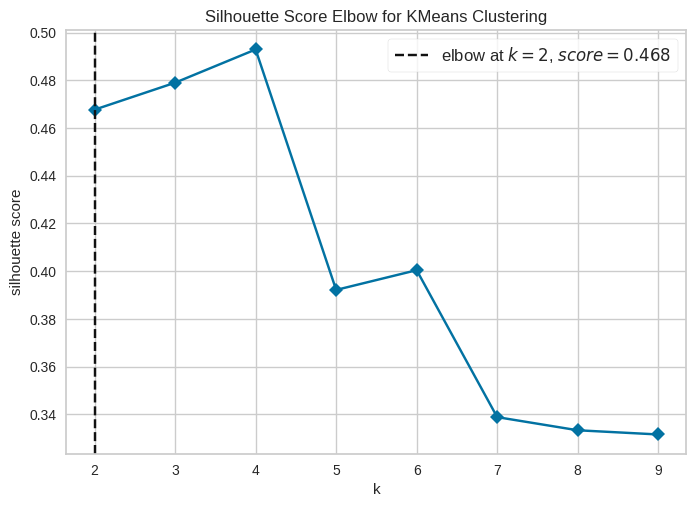

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [54]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(clustering, k=(2,10), metric="silhouette", timings=False)

visualizer.fit(X_scaled_df)
visualizer.show()

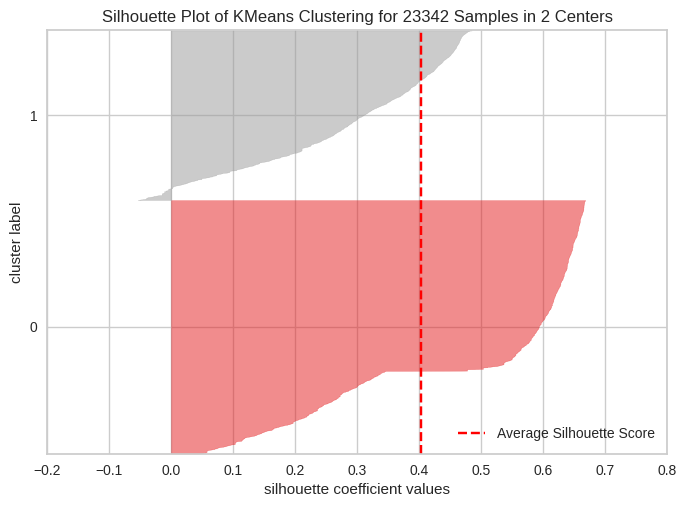

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 23342 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [79]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans_model = KMeans(2, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_model, timings=False)

visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

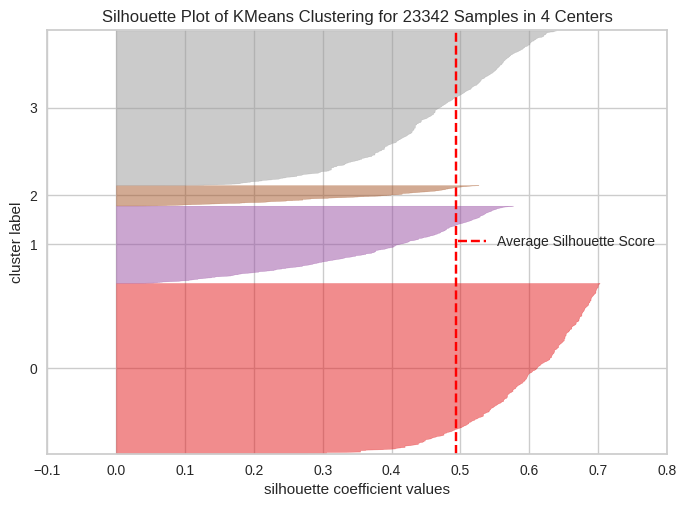

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 23342 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [56]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans_model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_model, timings=False)

visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [57]:
n_clusters_kmeans = 4

In [58]:
from sklearn.cluster import KMeans

# Initialize KMeans model with n_clusters and random_state=42
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42)

# Fit the model and predict cluster labels, excluding the existing 'cluster_labels' column
X_scaled_df['cluster_labels'] = kmeans.fit_predict(X_scaled_df).astype(str)

# Display the value counts of the new cluster labels
print(X_scaled_df['cluster_labels'].value_counts())


cluster_labels
0    9419
3    8540
1    4262
2    1121
Name: count, dtype: int64


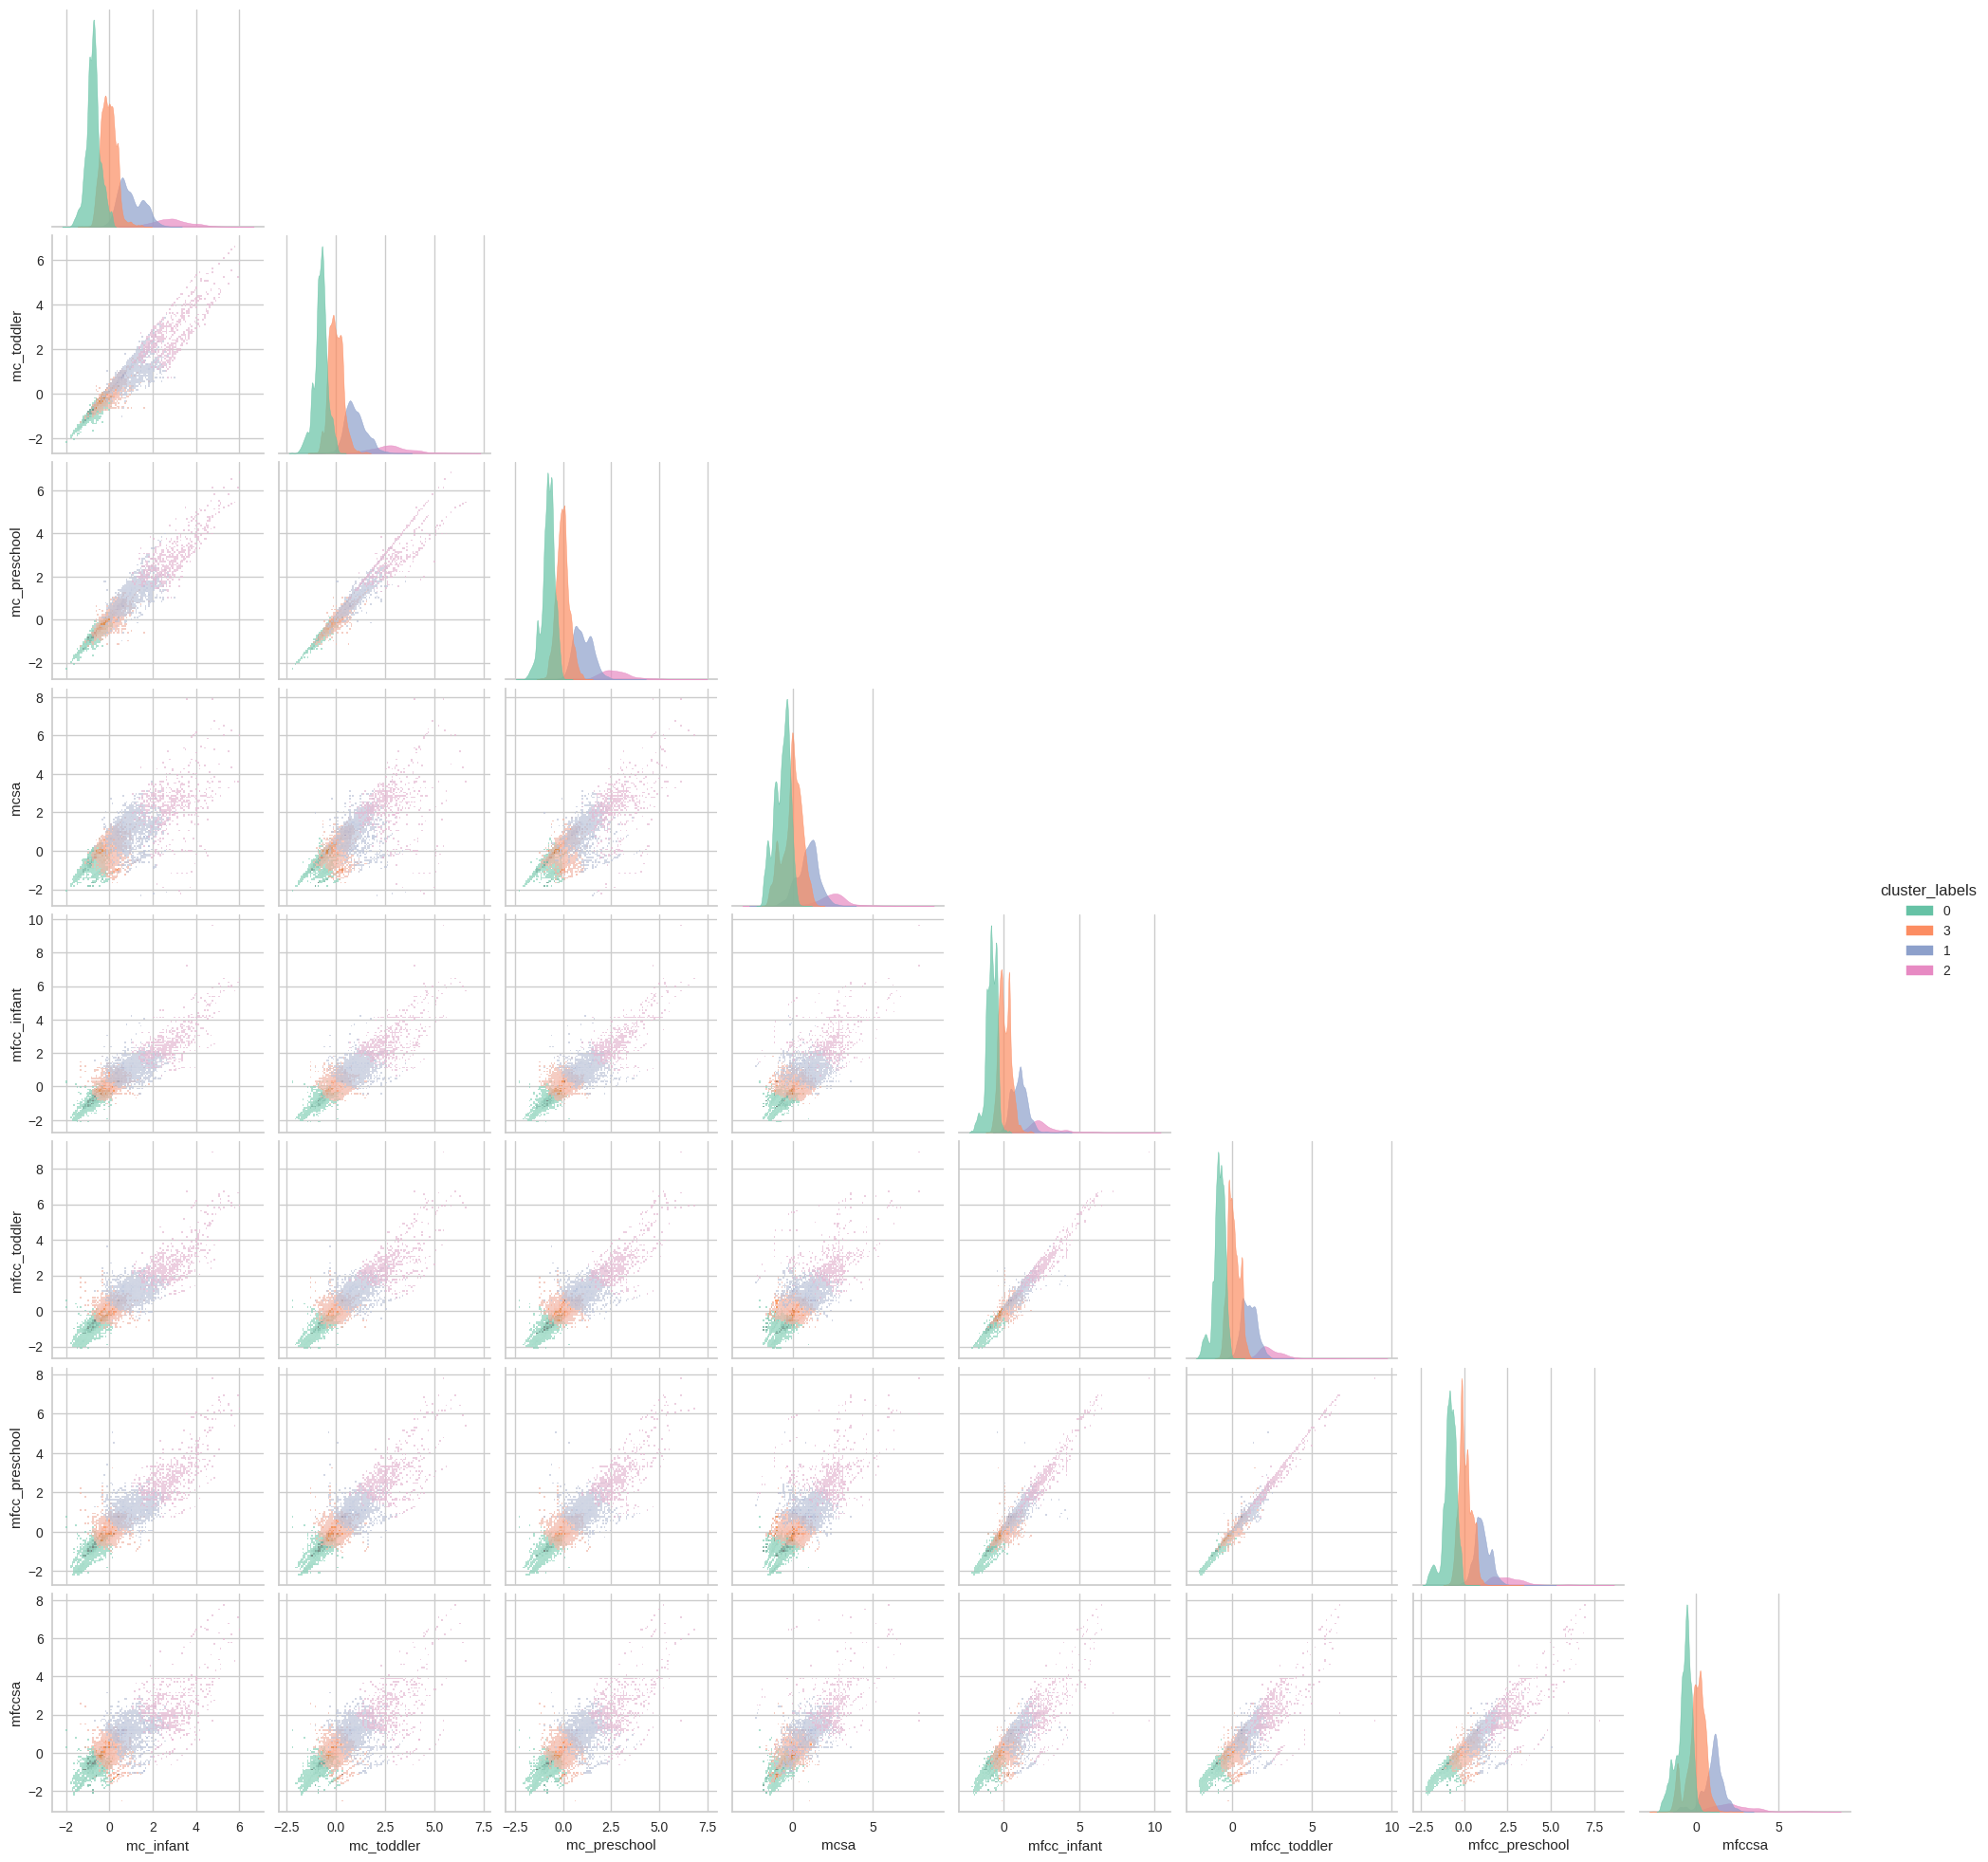

In [59]:
sns.pairplot(X_scaled_df, hue="cluster_labels", kind="hist", diag_kind="kde", corner=True, palette="Set2",
    plot_kws={'alpha': 0.7}, # Adjusts transparency of the scatter points (0.0 to 1.0)
    diag_kws={'alpha': 0.7}  # Adjusts transparency of the diagonal plots (histograms/KDEs)
    )

In [60]:
pd.DataFrame(scaler.inverse_transform(X_scaled_df.groupby("cluster_labels").median(numeric_only=True)), columns = X_scaled_df.columns[:-1])

,mc_infant,mc_toddler,mc_preschool,mcsa,mfcc_infant,mfcc_toddler,mfcc_preschool,mfccsa
0,105.00,97.33,92.58,80.19,86.58,81.92,81.000,75.00
1,193.00,170.00,160.00,136.00,147.17,137.58,132.585,123.10
2,299.80,250.91,225.00,186.82,191.67,175.00,173.580,149.85
3,142.75,128.75,120.00,101.55,114.06,107.10,104.495,94.64


/tmp/ipython-input-1277253569.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X_scaled_df, x='cluster_labels', y="mc_infant", palette="Set2")


<Axes: xlabel='cluster_labels', ylabel='mc_infant'>

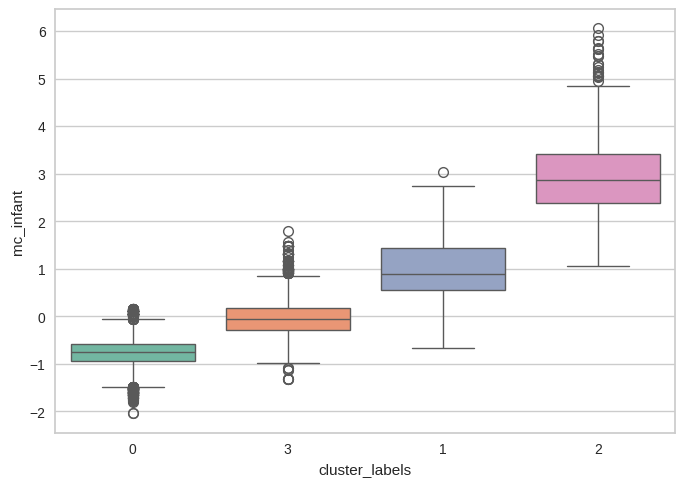

In [61]:
# Show boxplots of all features per cluster
sns.boxplot(data=X_scaled_df, x='cluster_labels', y="mc_infant", palette="Set2")

### Merge datasets

In [62]:
X_scaled_df.head()

,mc_infant,mc_toddler,mc_preschool,mcsa,mfcc_infant,mfcc_toddler,mfcc_preschool,mfccsa,cluster_labels
0,-0.760837,-0.578337,-0.939269,-0.586440,-0.912068,-0.776245,-0.785747,-0.400439,0
1,-0.757849,-0.574656,-0.895706,-0.514128,-0.792037,-0.644831,-0.637943,-0.245609,0
2,-0.754675,-0.570746,-0.852143,-0.441817,-0.672006,-0.513418,-0.490140,-0.090779,0
3,-0.751500,-0.566836,-0.808581,-0.369216,-0.551671,-0.381671,-0.341991,0.064413,0
4,-0.748513,-0.563156,-0.765018,-0.296904,-0.431640,-0.250258,-0.194187,0.219243,3


In [76]:
df2["state_abbreviation"].nunique()

51

In [63]:
kmeans = KMeans(
    n_clusters=n_clusters_kmeans,
    random_state=42,
    n_init=10
)

labels = kmeans.fit_predict(X_scaled_df)

In [64]:
df_clustered = df.loc[X_scaled_df.index].copy()
df_clustered["cluster"] = labels

In [65]:
df_clustered["county_fips_code"].dtype
df2["county_fips_code"].dtype

dtype('int64')

In [66]:
df_merged = df_clustered.merge(df2,on="county_fips_code",how="left")

In [67]:
df_merged[["county_fips_code", "county_name", "state_abbreviation", "cluster"]].head()

,county_fips_code,county_name,state_abbreviation,cluster
0,1001,Autauga County,AL,0
1,1001,Autauga County,AL,0
2,1001,Autauga County,AL,0
3,1001,Autauga County,AL,0
4,1001,Autauga County,AL,2


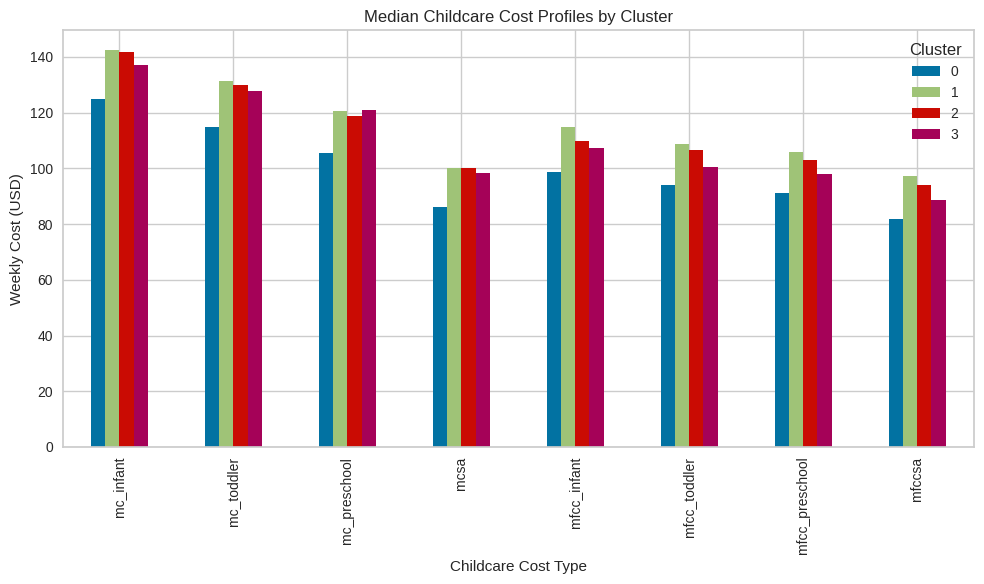

In [72]:
cluster_profile = (
    df_merged
    .groupby("cluster")[cost_cols]
    .median()
)

cluster_profile.T.plot(kind="bar", figsize=(10,6))

plt.title("Median Childcare Cost Profiles by Cluster")
plt.ylabel("Weekly Cost (USD)")
plt.xlabel("Childcare Cost Type")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [77]:
state_cluster_share = pd.crosstab(
    df_merged["state_abbreviation"], df_merged["cluster"], normalize="index")

state_cluster_share

cluster,0,1,2,3
state_abbreviation,,,,
AK,0.342767,0.169811,0.477987,0.009434
AL,0.573948,0.000000,0.426052,0.000000
AR,0.072727,0.522424,0.036364,0.368485
AZ,0.781818,0.000000,0.218182,0.000000
CA,0.115987,0.186520,0.680251,0.017241
CO,0.519886,0.069602,0.394886,0.015625
CT,0.227273,0.238636,0.397727,0.136364
DC,0.363636,0.000000,0.636364,0.000000
DE,0.363636,0.000000,0.636364,0.000000


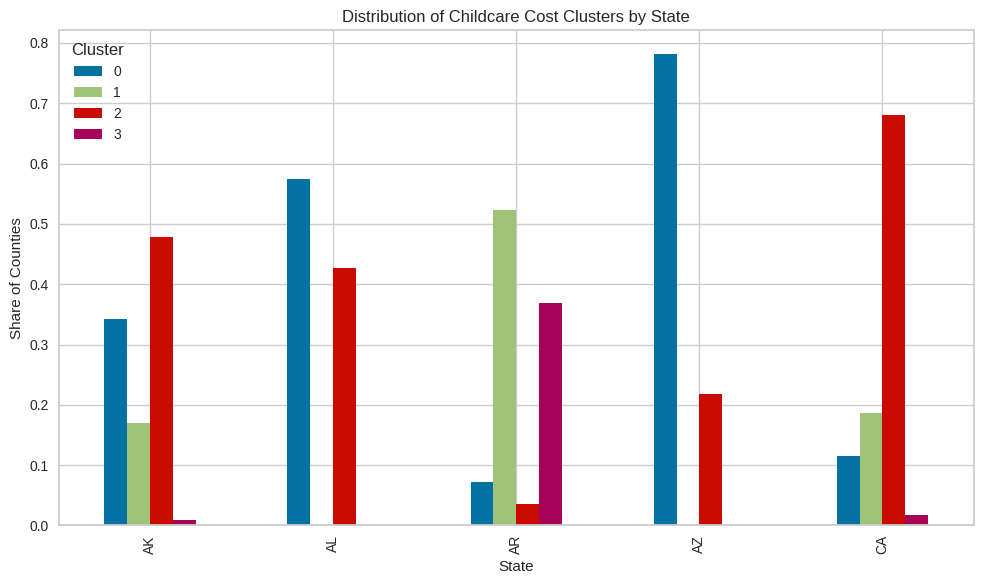

In [74]:
state_cluster_share.loc[["AK", "AL", "AR", "AZ","CA"]].plot(
    kind="bar", figsize=(10,6))

plt.title("Distribution of Childcare Cost Clusters by State")
plt.ylabel("Share of Counties")
plt.xlabel("State")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()
